# Analyse de la maille cristalline

In [1]:
# Anatole Moureaux
# 20 Feb 2020

from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.symmetry.analyzer import *
from tabulate import tabulate

## Téléchargement du fichier CIF symmetrized

In [2]:
#mission 4
print("Téléchargement du fichier CIF...")
structure = MPRester("H45GsyS7rpfkZzFI").get_structure_by_material_id("mp-9361")
CifWriter(structure,0.1, write_magmoms=False).write_file("RbLaS2_mp-9361_symmetrized.cif")
print("Téléchargement terminé !")

Téléchargement du fichier CIF...
Téléchargement terminé !


## Analyse des paramètres de la maille cristalline

In [3]:
#mission 5

#réseau direct
directNetwork = structure.lattice

#affichage des caractéristiques géométriques
#de la cellule primitive
print("Caractéristiques géométriques :")
spa = SpacegroupAnalyzer(structure,0.1)
data = spa.get_primitive_standard_structure()
print(data)
print("\n")

Caractéristiques géométriques :
Full Formula (Rb1 La1 S2)
Reduced Formula: RbLaS2
abc   :   8.077087   8.077087   8.077087
angles:  31.068526  31.068526  31.068526
Sites (4)
  #  SP           a         b         c
---  ----  --------  --------  --------
  0  Rb    0         0         0
  1  La    0.5       0.5       0.5
  2  S     0.767527  0.767527  0.767527
  3  S     0.232473  0.232473  0.232473




In [4]:
#calcul et affichage des vecteurs de base
a=data.lattice.a
alpha=data.lattice.alpha
print("Vecteurs de base du réseau direct :")
print(SpacegroupAnalyzer(data).find_primitive().lattice.rhombohedral(a,alpha).matrix)
print("\n")

Vecteurs de base du réseau direct :
[[4.16828463 0.         6.91843428]
 [1.92310779 3.69814186 6.91843428]
 [0.         0.         8.0770867 ]]




In [5]:
#réseau réciproque
reciprocalNetwork = structure.lattice.reciprocal_lattice

#calcul et affichage des vecteurs du réseau réciproque
print("Vecteurs de base du réseau réciproque :")
print(spa.find_primitive().lattice.rhombohedral(a,alpha).reciprocal_lattice.matrix)
print("\n")

Vecteurs de base du réseau réciproque :
[[ 1.50737914 -0.78386733  0.        ]
 [ 0.          1.69901144  0.        ]
 [-1.29114666 -0.78386733  0.77790242]]




In [6]:
#le reste

#type de maille
latticeType = spa.get_lattice_type()
#système cristallin
cristalSystem = spa.get_crystal_system()
#groupe ponctuel
pointGroup = spa.get_point_group_symbol()

In [7]:
#affichage des dernières données

print(tabulate([
    ["Vecteurs du réseau direct",str(directNetwork)], 
	["","------------------------------------------------------------"],
	["Longueurs (a,b,c)",str(directNetwork.abc)],
	["Angles (alpha,beta,gamma)",str(directNetwork.angles)],
	["------------------------------","------------------------------------------------------------"],
	["Vecteurs du réseau réciproque", str(reciprocalNetwork)],
	["","------------------------------------------------------------"],
	["Longueurs (a,b,c)",str(reciprocalNetwork.abc)],
	["Angles (alpha,beta,gamma)",str(reciprocalNetwork.angles)],
	["------------------------------","------------------------------------------------------------"],
	["Type de maille",str(latticeType)],
	["Système cristallin",str(cristalSystem)],
	["Groupe ponctuel",str(pointGroup)]]))

------------------------------  ------------------------------------------------------------
Vecteurs du réseau direct       4.164641 -0.002581 6.920628
                                1.919793 3.695760 6.920628
                                -0.004253 -0.002581 8.077085
                                ------------------------------------------------------------
Longueurs (a,b,c)               (8.077086703595654, 8.077086706045057, 8.077086702121592)
Angles (alpha,beta,gamma)       (31.068525916388843, 31.06852589146119, 31.06852588817123)
------------------------------  ------------------------------------------------------------
Vecteurs du réseau réciproque   1.507309 -0.784001 0.000543
                                0.000151 1.699011 0.000543
                                -1.291626 -0.784001 0.776972
                                ------------------------------------------------------------
Longueurs (a,b,c)               (1.6990114378967087, 1.6990114361545903, 1.699011436817

La système cristallin du $RbLaS_2$ est donc le système *trigonal* et la maille est de type *rhomboédrique*.

Son groupe spatial est $R\overline{3}m$.

On utilise le package $symmetry.analyzer$ pour obtenir les informations relatives aux grandeurs caractéristiques de la maille.



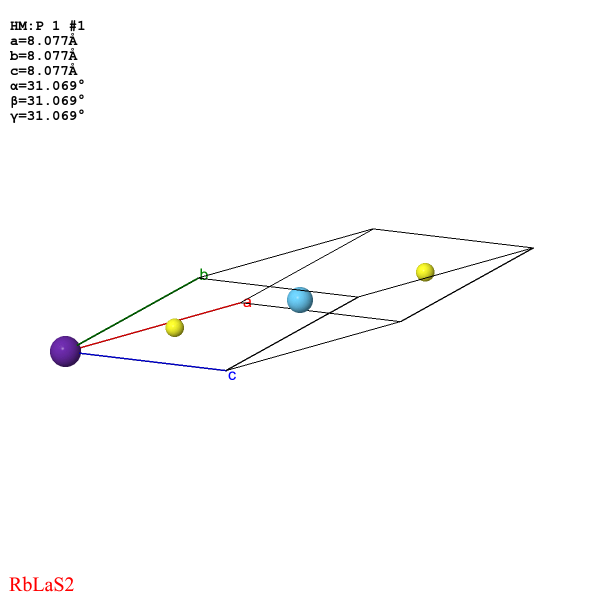

Ci-dessus, on peut voir le motif répété dans la maille. On constate bien l'atome de Rubidium en <span style="color:#702EB0">mauve</span> et de coordonnées réduites $\begin{pmatrix}0 & 0 & 0\end{pmatrix}$, le Lanthane en <span style="color:#70D4FF">bleu</span>, de coordonnées réduites $\begin{pmatrix}0.5 & 0.5 & 0.5\end{pmatrix}$ et les deux atomes de Soufre en <span style="color:#FFFF30">jaune</span>, dont les coordonnées réduites sont $\begin{pmatrix}0.23 & 0.23 & 0.23 \end{pmatrix}$ et $\begin{pmatrix}0.77 & 0.77 & 0.77 \end{pmatrix}$.

La maille conventionnelle est la suivante : 

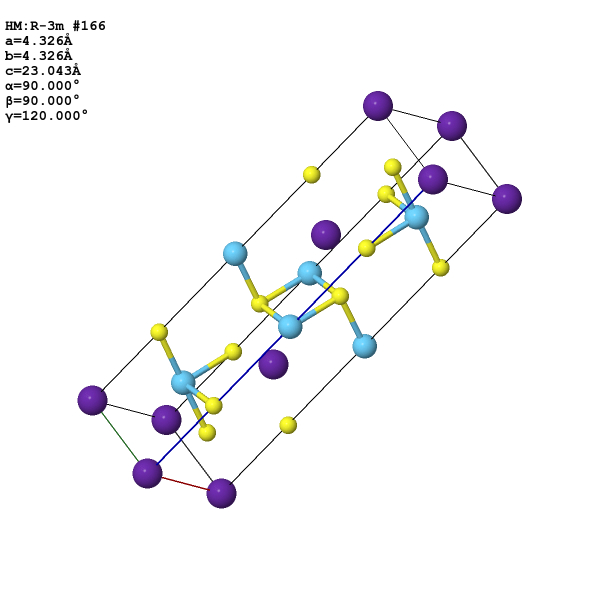

et la maille primitive est : 

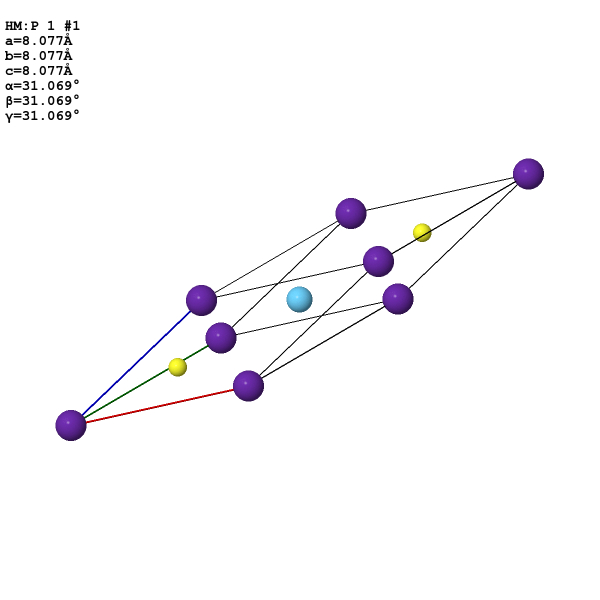

On constate bien la présence de $8$ "*huitièmes*" d'atomes de Rb, un atome de La et deux atome de S dans la cellule primitive. 

### Réseau direct
Comme indiqué ci-dessus, les longueurs des trois vecteurs de base $\begin{pmatrix}a&b&c\end{pmatrix}$ valent $\begin{pmatrix}8.077&8.077&8.077\end{pmatrix} \mathring{A}$.

Les angles $\begin{pmatrix}\alpha&\beta&\gamma\end{pmatrix}$ valent $\begin{pmatrix}31.07&31.07&31.07\end{pmatrix}^\circ$. On retrouve donc bien les 3 vecteurs de base de longueur identique et les 3 angles de bases également identiques et différents de $90^\circ$ propres aux systèmes cristallins trigonaux.

Les vecteurs de base du réseau direct sont donnés par : <div align="center">$\begin{align*}\vec{a}&=a\cdot \begin{pmatrix}4.16828463 & 0 & 6.91843428\end{pmatrix}\\\vec{b}&=b\cdot \begin{pmatrix}1.92310779 &3.69814186& 6.91843428\end{pmatrix}\\\vec{c}&=c\cdot \begin{pmatrix}0& 0 &8.0770867 \end{pmatrix}\end{align*}$</div>
Et l'on peut donc déterminer le volume de la maille par <div align="center">$\begin{align*}\Omega &= \vec{a}\cdot(\vec{b}\times\vec{c})\\&=124.508\mathring{A}^3\end{align*}$</div>

### Réseau réciproque

Il est en outre possible de déterminer théoriquement les vecteurs de base du réseau réciproque via <div align="center">$\begin{align*}\vec{a}^* &= \dfrac{2\pi}{\Omega}(\vec{b}\times\vec{c}) = \begin{pmatrix}1.50737914 &-0.78386733 & 0\end{pmatrix}\\\vec{b}^* &= \dfrac{2\pi}{\Omega}(\vec{c}\times\vec{a}) = \begin{pmatrix}0 & 1.69901144  &0\end{pmatrix}\\\vec{c}^* &= \dfrac{2\pi}{\Omega}(\vec{a}\times\vec{b}) = \begin{pmatrix}-1.29114666& -0.78386733  &0.77790242\end{pmatrix}\\\end{align*}$</div>
Ces résultats sont vérifiés par les données obtenues dans le code.
Et le volume de la maille dans le réseau réciproque est donc donné par 
<div align="center">$\begin{align*}\Omega^* &= \vec{a}^*\cdot(\vec{b}^*\times\vec{c}^*)\\&=1.992\mathring{A}^3\end{align*}$</div>
On remarque que la relation <div align="center">$\begin{equation*}\Omega^* = \dfrac{(2\pi)^3}{\Omega}\end{equation*}$</div> est bien respectée.